
**importing the dependencies/libraries**

In [ ]:
import numpy as np                                        #numpy used to make arrays 
import pandas as pd                                       #pandas used to make dataframes(structured tables)
import matplotlib.pyplot as plt                           # matplolib and seaborn used to create plots and graphs(data visualization)
import seaborn as sns 
from sklearn.model_selection import train_test_split      #train test split function to split the dataset into data for training and data for testing
from xgboost import XGBRegressor                    
from sklearn import metrics                               #sklearn a machine learning lib , and metrics to evaluate our model.

**Data collection and processing**

In [ ]:
# loading the data from csv(comma seprated) file to a pandas dataframe 
calories = pd.read_csv('/content/calories.csv')

FileNotFoundError: ignored

In [ ]:
#printing the first 5 row of dataframe to check
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


**Combining the two dataframes**

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
#checking the number of rows and columns
calories_data.shape
# getting information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
#checking for missing/null values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

**Data Analysis**

In [ ]:
#statistical information about the data 
calories_data.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Data Visualisation**

In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


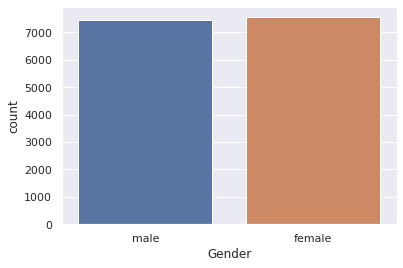

In [ ]:
#plotting the gender column on countplot to check the distribution of male and female in our dataset
sns.countplot(calories_data['Gender'])
#countplots are useful for categorial data/values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


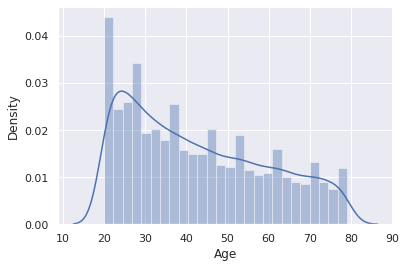

In [ ]:
# displaying the distribution of age column
sns.distplot(calories_data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


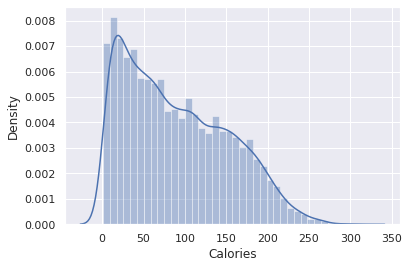

In [ ]:
sns.distplot(calories_data['Calories'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


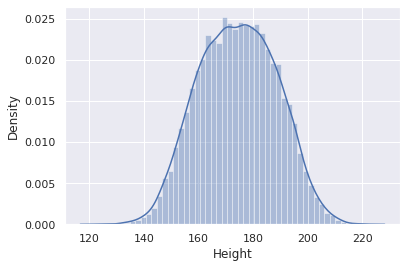

In [ ]:
# displaying the distribution of height column
sns.distplot(calories_data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


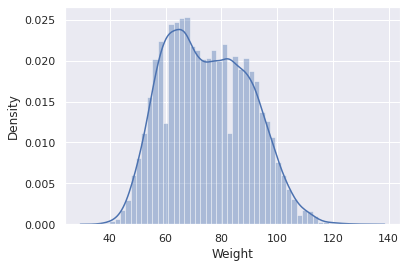

In [ ]:
# displaying the distribution of weight column
sns.distplot(calories_data['Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


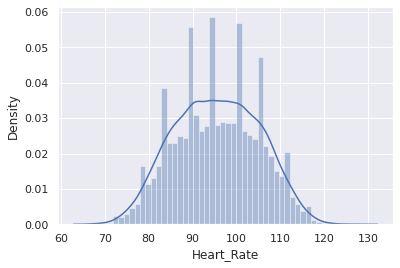

In [ ]:
# displaying the distribution of heart rate column
sns.distplot(calories_data['Heart_Rate'])

**Finding the correlation of the Dataset**

Two types of correlation 

1.Positive correlation: if one attribute increases the other also increases example: more duration means more calories burnt(they are directly propotional)

2.Negative correlation: if one attribute increases the other decreases(they are inversely propotional)

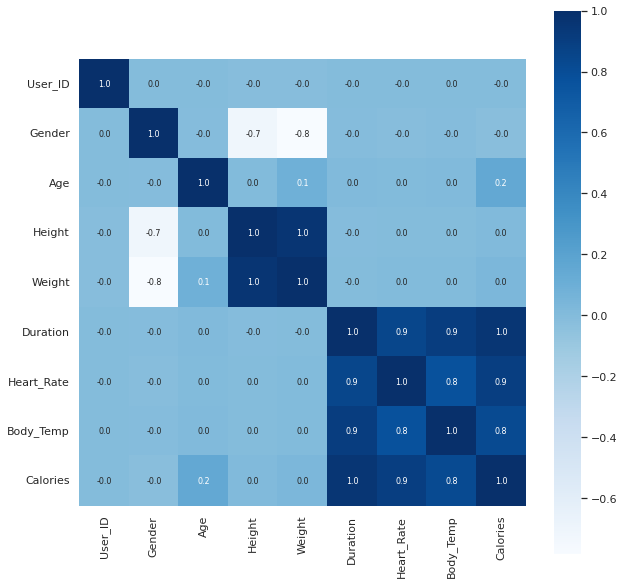

In [ ]:
correlation= calories_data.corr()
#constructing a heatmap to understand the correlation 
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

heatmap gives colours based on the values and this value is calculated based on the relationship between the data. if the value is 1 the features/attributes of the data set are positively correlated and strongly correlated as the value decreases, it shows the correlation of atrributes is less and if value becomes 0 there is no correlation at all.

**Converting the text data of gender column to numerical value**

In [ ]:
calories_data.replace({"Gender":{'male':0, 'female':1}},inplace=True)

NameError: ignored

**Separating features and target (calories)**

In [ ]:
X= calories_data.drop(columns=['User_ID','Calories'])          #dropping/removing these from the dataframe
Y= calories_data['Calories']                                   #just displaying calories in different dataframe

In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


**Splitting the data into training data and test data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.2 ,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


**Model Training**

XGBoost Regressor

In [ ]:
# loading the model
model =  XGBRegressor ()

In [ ]:
#training the model with X_train 
model.fit(X_train, Y_train)

[15:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

**Model Evaluation**

Prediction on test data

In [ ]:
training_data_prediction= model.predict(X_train)

In [ ]:
test_data_prediction= model.predict(X_test)

In [ ]:
print(test_data_prediction)

[129.06204  223.79721   39.181965 ... 145.59767   22.53474   92.29064 ]


In [ ]:
r2_train= metrics.r2_score( Y_train, training_data_prediction)
print(r2_train)

0.9966777021480265


In [ ]:
r2_test= metrics.r2_score( Y_test, test_data_prediction)
print(r2_test)

0.9963065655529431


**Mean Absolute Error**

In [ ]:
mae = metrics.mean_absolute_error( Y_test, test_data_prediction)

In [ ]:
print("Mean Absolute Error=", mae)

Mean Absolute Error= 2.7159012502233186


In [ ]:
model.score( X_test,Y_test) *100

99.63065655529431

**Taking input and then predicting**

In [ ]:
data= { 'Gender':1,
      'Age':39,
       'Height':175,
       'Weight':74,
       'Duration':16,
       'Heart_Rate':96,
       'Body_Temp':40.2}

df=pd.DataFrame(data,index=[0])
df

NameError: ignored

In [ ]:
new_prediction= model.predict(df)
print(new_prediction)

[79.45823]
